# Sentiment Analysis/Opinion Mining

## Objectives

- Understanding: 
    - Sentiment Analysis Tasks
        - Polarity Classification
        - Subjectivity Identification
        - Aspect/Feature-based Sentiment Analysis
    - Supervised Sentiment Analysis
    - Lexicon-based Sentiment Analysis
    - Aspect-based Sentiment Analysis
    
- Learning how to:
    - Perform supervised polarity classification
    - Use polarity/subjectivity lexicons for polarity and subjectivity detection
    - Use negation and valence shifter in sentiment analysis
    - Use dependency parsing for simple aspect extraction


### Recommended Reading
- Dan Jurafsky and James H. Martin. [__Speech and Language Processing__ (SLP)](https://web.stanford.edu/~jurafsky/slp3/) (3rd ed. draft)

### Covered Material
- SLP
    - [Chapter 20: Lexicons for Sentiment, Affect, and Connotation](https://web.stanford.edu/~jurafsky/slp3/25.pdf) 

### Requirements
- [NLTK](http://www.nltk.org/)    
- [spaCy](https://spacy.io/)

## 1. Sentiment Analysis Tasks

[Sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis) (also known as **opinion mining**) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study _affective states_ and _subjective information_.

- __Polarity Classification__: classify an opinion exressed by a given text as positive, negative, or neutral.
    - alternatively predict:
        - rating score (number of stars) 
        - emotion label (anger, fear, etc.)
    - different levels:
        - word in context
        - sentence
        - document

- __Subjectivity/Objectivity Identification__: classifying a given text (usually a sentence) into subjective (*opinion*) and objective (*factual*) classes.
    - sometimes harder than polarity classification

- __Feature/Aspect-based Sentiment Analysis__: sentiments expressed on different features or aspects of entities.
    - involves several sub-problems
        - identifying relevant entities
        - extracting their features/aspects
        - classifying polarity of expressed opinion for an aspect
    - common methods are syntactic patterns and topic modeling

## 2. Polarity Classification using Supervised Machine Learning

- Pang, Lee, and Vaithyanathan. "Thumbs up? Sentiment classification using machine learning techniques". EMNLP. 2002.
- Pang and Lee. "[A sentimental education: Sentiment analysis using subjectivity summarization based on minimum cuts.](https://arxiv.org/pdf/cs/0409058.pdf)" ACL. 2004.

__Bottom-Line__:
- Machine Learning-based Sentiment Classification outperforms term counting 
- Unigrams as features are good enough (the best performance)
- __negation marking__ is useful
- __subjectivity detection__ is effective for polarity classification (at least for Niave Bayes)


#### Negation Marking

- Append `_NEG` suffix (or similar) to words that appear in the scope between a negation and a punctuation mark.

- implemented in `nltk.sentiment.util.mark_negation`

- handles double negations: (double negation is considered affirmation)


### 2.1. Polarity Classification on Movie Reviews

- Pang and Lee (2004). 
- 1000 negative & 1000 positive reviews extracted from the Internet Movie Database (IMDb)
- tokenized & lowercased
- Stratified 10-fold cross-validation

In [ ]:
import nltk
nltk.download('movie_reviews')

In [ ]:
from nltk.corpus import movie_reviews
mr = movie_reviews
rev_neg = mr.paras(categories='neg')
rev_pos = mr.paras(categories='pos')

In [ ]:
# uncomment & run to see that a document is a list of lists 
print(rev_neg[0])

In [ ]:
# Let's use simple Naive Bayes Classification
import numpy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report

vectorizer = CountVectorizer()
classifier = MultinomialNB()

In [ ]:
def lol2str(doc):
    # flatten & join
    return " ".join([w for sent in doc for w in sent])

In [ ]:
# Let's prepare labels & data for scikit-learn
corpus = [lol2str(d) for d in rev_neg] + [lol2str(d) for d in rev_pos]
# Just to keep the code clean as vectorizer should be applied on the Training set only
vectors = vectorizer.fit_transform(corpus)
labels = numpy.array([0] * len(rev_neg) + [1] * len(rev_pos))

In [ ]:
# 10-fold cross-validation
scores = cross_validate(classifier, vectors, labels, cv=StratifiedKFold(n_splits=10) , scoring=['f1_micro'])
average = sum(scores['test_f1_micro'])/len(scores['test_f1_micro'])
print(round(average, 3))

### Exercise 1
- Experiment with and without applying the [Negation Marking](https://www.nltk.org/_modules/nltk/sentiment/util.html#mark_negation) to Movie Reviews Dataset
    - expects list as input
- Train SVM model
- Compare results to Naive Bayes performance

In [ ]:
from nltk.sentiment.util import mark_negation
print(mark_negation("This is not cool".split()))

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score

new_neg = []
for rev in rev_neg:
    new_rev = []
    for sentence in rev:
        new_rev.append() # Apply or not the negation
    new_neg.append(new_rev)
    
new_pos = []
for rev in rev_pos:
    new_rev = []
    for sentence in rev:
        new_rev.append() # Apply or not the negation
    new_pos.append(new_rev)   
    
# Prepare corpus and labels (it's copied from above)
new_corpus = [lol2str(d) for d in new_neg] + [lol2str(d) for d in new_pos]
vectors = vectorizer.fit_transform(new_corpus)

ref = numpy.array([0] * len(rev_neg) + [1] * len(rev_pos))
# Inizialize the StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores_svm = []
scores_nb = []
for i, (train_index, test_index) in enumerate(skf.split(new_corpus, ref)):
    
    x_train, x_test = [new_corpus[indx] for indx in train_index], [new_corpus[indx] for indx in test_index]
    y_train, y_test = [ref[indx] for indx in train_index], [ref[indx] for indx in test_index]
    vectorizer = CountVectorizer()
    # Train the vectorizer on train split
    vectorizer.fit(x_train)
    train_features = vectorizer.transform(x_train)
    test_features = vectorizer.transform(x_test)
    
    svm_classifier = # Instantiate LinearSVM don't forget C parameter
    nb_classifier = # Instantiate Multinomial Naive Bayes
    
    clf_svm = # Train the svm
    hyp_svm = # make the prediction
#     print(classification_report(y_test, hyp_svm))
    scores_svm.append() # Append Macro f1 score
    clf_nb = # Train MultinomialNB
    hyp_nb = # Make the prediction
#     print(classification_report(y_test, hyp_nb))
    scores_nb.append() # Append Macro f1 score
    
print('SVM:', round(sum(scores_svm)/len(scores_svm), 3))
print('NB:', round(sum(scores_nb)/len(scores_nb), 3))

## 3. Lexicon-Based Sentiment Analysis with NLTK

### 3.1. Sentiment Analysis with SentiWordNet

#### 3.1.1. SentiWordNet

- Esuli & Sebastiani (LREC 2006) ["SENTIWORDNET: A Publicly Available Lexical Resource for Opinion Mining"](https://github.com/aesuli/SentiWordNet/blob/master/papers/LREC06.pdf)

- synset classification into positive-negative and subjective-objective classes
    - 3 labels: Positive, or Negative, or Objective
    - A term can be both Positive and Negative
- relies on training a set of classifiers for each class
    - different training data and algorithm
- synset score reflects the classifier agreement
- scores for Positive, Negative, and Objective sum to 1.0

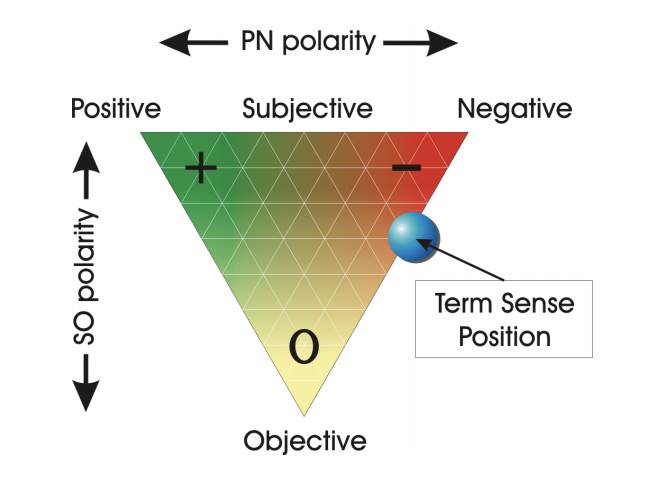

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('sentiwordnet')

In [ ]:
from nltk.corpus import sentiwordnet as swn

#### Example
Let's get synsets and their scores for a word "*delicous*"

- From word 2 scores

In [ ]:
senses = swn.senti_synsets('delicious')

In [ ]:
for sense in senses:
    print(sense)  # get sense representation
    print(sense.pos_score())  # get positive score
    print(sense.neg_score())  # get negative score
    print(sense.obj_score())  # get objectivity score

- We can use pos-tags for filtering similar to WordNet

In [ ]:
senses = swn.senti_synsets('delicious', pos='a')
print(list(senses))

- From synset to scores

In [ ]:
synset = 'delightful.s.01'
sense = swn.senti_synset(synset)
print(sense)  # get sense representation
print(sense.pos_score())  # get positive score
print(sense.neg_score())  # get negative score
print(sense.obj_score())  # get objectivity score


#### 3.1.2. WSD Adaptation

##### Practical Issues
- Since scores are assigned to WordNet synsets, Word Sense Disambiguation is useful
- Baseline is the first (most common) sense

In this, we use the Lesk algorithm which extract the most appropriate sense given a token and its context. We will see this and other similar algorithms in details towards the end of the course.  

In [ ]:
from nltk.corpus import wordnet

# Lest algorithm extracts the most appropriate token given its context

def lesk(context_sentence, ambiguous_word, pos=None, synsets=None):
    """Return a synset for an ambiguous word in a context.

    :param iter context_sentence: The context sentence where the ambiguous word
         occurs, passed as an iterable of words.
    :param str ambiguous_word: The ambiguous word that requires WSD.
    :param str pos: A specified Part-of-Speech (POS).
    :param iter synsets: Possible synsets of the ambiguous word.
    :return: ``lesk_sense`` The Synset() object with the highest signature overlaps.
    """

    context = set(context_sentence)
    if synsets is None:
        synsets = wordnet.synsets(ambiguous_word)

    if pos: # We filter the senses based on their part of speech tags otherwise we use the whole list
        if pos == 'a':
            synsets = [ss for ss in synsets if str(ss.pos()) in ['a', 's']]
        else:
            synsets = [ss for ss in synsets if str(ss.pos()) == pos]

    if not synsets:
        return None
    _, sense = max(
        (len(context.intersection(ss.definition().split())), ss) for ss in synsets
    )
    return sense

#### 3.1.3. NLTK POS-Tagging

In [ ]:
from nltk import pos_tag

In [ ]:
# universal tags to WordNet tags for WordNet
# nltk.download('universal_tagset')
# nltk.download('averaged_perceptron_tagger')

# ADJ is adjective
# ADV is adverb
pos2wn = {"NOUN": "n", "VERB": "v", "ADJ": "a", "ADV": "r"}


In [ ]:
# Let's pot-tag first sentence of Movie Reviews using Universal Tag Set
# & convert it to WordNet Tags
tagged = pos_tag(rev_neg[0][0], tagset='universal')
# if it is not among these 4, we can set it to None, since it is not in WordNet
wntags = [(w, pos2wn.get(t, None)) for w,t in tagged]
print(wntags)

#### 3.1.4. Scoring a Document with SentiWordNet
- POS-tagging
- Word Sense Disambiguation
- Score per document/sentence/token

In [ ]:
def score_sent(sent, use_pos=False):
    pos = []
    neg = []
    obj = []
    if use_pos:
        tagged_sent = pos_tag(sent, tagset='universal')
    else:
        tagged_sent = [(w, None) for w in sent]
        
    for tok, tag in tagged_sent:
        ss = lesk(sent, tok, pos=pos2wn.get(tag, None))
        if ss:
            sense = swn.senti_synset(ss.name())
            pos.append(sense.pos_score())
            neg.append(sense.neg_score())
            obj.append(sense.obj_score())
    return pos, neg, obj

In [ ]:
def score(doc, use_pos=False):
    pos = []
    neg = []
    obj = []
    for sent in doc:
        sent_pos, sent_neg, sent_obj = score_sent(sent, use_pos=use_pos)
        pos.extend(sent_pos)
        neg.extend(sent_neg)
        obj.extend(sent_obj)
    
    scores = {
        "pos": sum(pos),
        "neg": sum(neg),
        "obj": sum(obj)
    }    
    return scores
    

In [ ]:
print(score(rev_neg[0]))
print(score(rev_neg[0], use_pos=True))

### 3.2. From Scores to Labels

The simplest classification function would be taking the max of negative and positive scores to assign polarity.
Let's break ties as positives (could be random)

In [ ]:
def classify(doc, pos=False):
    scores = score(doc, use_pos=pos)
    return "N" if scores.get("neg") > scores.get("pos") else "P"

#### 3.2.1. Classifying Movie Reviews

In [ ]:
# Let's create labels
neg_ref = ['N'] * len(rev_neg)
pos_ref = ['P'] * len(rev_pos)
ref = neg_ref + pos_ref

In [ ]:
# Classification without POS-tags
neg_hyp = [classify(doc) for doc in rev_neg]
pos_hyp = [classify(doc) for doc in rev_pos]
hyp = neg_hyp + pos_hyp

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ref, hyp))

In [ ]:
# Classification with POS-tags
neg_hyp_pos = [classify(doc, pos=True) for doc in rev_neg]
pos_hyp_pos = [classify(doc, pos=True) for doc in rev_pos]
hyp_pos = neg_hyp_pos + pos_hyp_pos
print(classification_report(ref, hyp_pos))

### 3.2.2. The Simplest Counting Approach
- count positive and negative terms;
- document is __positive__, if the count of positive terms is higher than the count of negative terms
- document is __negative__, if the count of negative terms is higher than the count of positive terms
- document is __neutral__, if it contains an equal number of positive or negative terms

#### 3.2.3. Term Counting with Valence Shifters and Intensifiers

(Kennedy and Inkpen, "Sentiment Classification of Movie and Product Reviews Using Contextual Valence Shifters", FINEXIN, 2005)

- count positive and negative terms taking into account __valence shifters__ and __intensifiers__
- __valence shifters__ are terms that change the polarity of a term (e.g. negations: *not*, *none*)
- __intentsifiers__ are terms that increase of decrease the weight of a positive or negative term (e.g. *very*)


- all positive sentiment terms are given a value of 2;
- if they are preceded by an overstatement (intensifier) in the same clause then they are given a value of 3;
- if they are preceded by an understatement (diminisher) in the same clause then they are given a value of 1;
- Negative sentiment terms are given a value of -2 by default and -1 and -3 if preceded by understatements and overstatements respectively.

#### 3.2.4. Implementation (Example)
https://github.com/esrel/SentiLex

##### Algorithm

- Assign each token to a category:
    - punctuation (to reset intensity and valence shift)
    - polarity word (value from `-2` to `+2`, but could be any range)
    - intensifier word (value is `2`)
    - shifter word (value is `-1`)
- Iterate of a list of tagged words computing their score as
    - `shift * intensity * polarity`
    - reset shift and intensity (i.e. set to `1` if a word is punctuation)
- Skip words not in lexicon or punctuation
- Final score is sum of token-level scores
    - negative if score < 0, 
    - positive if score > 1

### 3.3. VADER Approach
[Valence Aware Dictionary for sEntiment Reasoning](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)

- Lexicon and heuristic based sentiment analysis
    - Considers both polarity and intensity
    - Valence ranges from -4 to +4
    - Neutral is 0
- Good for short texts (e.g. twits)
    - not rich enough features for machine learning approaches
- As accurate as a human (?)

#### 3.3.1. Extended Lexicon

Polarity & Intentsity words +:
- __Emoticons__: :D, :P, etc.
- __Acronyms__: LOL, ROFL, etc.
- __Other Sentiment Carrying Exressions__: meh, 

#### 3.3.2. VADER Heuristics

1. __Intensifiers__ either increase or decrease intensity.
    - *This is very bad.* is more intense than *This is slightly bad.*
    
2. __Polarity Shifters__ include conjunctions, specifically `but`, which signals shift in polarity, and the sentiment after `but` is dominant.
    - *This is bad, but we can handle it well.*
    - Mixed polarity, but overall sentiment is mostly due to the 2nd clause.
    
3. __Negations__ are considered in the window of preceding 3 words to a polarity bearing word. (Captures 90% of polarity shifts due to negation.)
    - *This is not that bad.*

4. __Punctuation__ is an *intensifier* (e.g. `!`)
    - *This is bad!* is more intense than *This is bad.*
    
5. __Capitalization__, especiall ALL-CAPS, intensifies a sentiment-bearing word in the context of other non-capitalized words.
    - *This is BAD.* is more intense than *This is bad.*

#### 3.3.3. Scoring

- The compound score is a sum of valence scores of each lexicon entry. 
- Valence scores are computed w.r.t. the heuristics and __normalized__ between -1 (negative) and 1 (positive).

__Normalization__

$$x = \frac{x}{\sqrt{x^2 + \alpha}}$$

where:
- $x$ -- sum of valence scores of constituent words
- $\alpha$ -- normalization constant (default is 15)

#### 3.3.4. VADER in NLTK

In [ ]:
import nltk
nltk.download('vader_lexicon')

##### Accessing VADER Lexicon

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer, VaderConstants
vlex = VaderConstants()
print(vlex.BOOSTER_DICT)

In [ ]:
print(vlex.NEGATE)

##### Polarity Classification with VADER

In [ ]:
analyzer = SentimentIntensityAnalyzer()

##### Illustration of the Heuristics

In [ ]:
data = [
    'This is bad .',
    'This is bad !',
    'This is BAD .',
    'This is very bad .',
    'This is slightly bad .',
    'This is bad , but we can handle it well .',
    'This is not that bad .',
    # combined features
    'This is very BAD !!!',
    "This is very BAD !!! :'(",
]

In [ ]:
for sent in data:
    print(analyzer.polarity_scores(sent))

### Exercise 2

Using the dataset **Movie Reviews**:

1. Implement classification using counts of negative and positive terms (i.e. convert scores to label at token-level and count those for a document) (*Using VADER*)
2. Implement classification using counts of negative and positive sentences (i.e. score sentences and aggregate their labels) (*Using VADER*)
3. Train and evaluate supervised machine learning model (SVM, MLP, etc.) by first removing objective sentences.
4. Classify Movie Reviews using VADER.
5. Do a proper cross-validation evaluation

In [ ]:
import numpy as np
print("WORD LEVEL")
print("="*89)
def polarity_word_level(document, analyzer):
    pos = 0
    neg = 0
    labels = ['P', 'N']
    for sentence in document:
        for w in sentence:
            value = # Extract the polarities using Vader
            # Using the compound value check if the word is positive or not
            # Discard neutrals 
    return labels[np.argmax(np.asarray([pos, neg]))]
# Sanity Check
hyp_word_level =  [polarity_word_level(doc, analyzer) for doc in rev_neg] + \
                  [polarity_word_level(doc, analyzer) for doc in rev_pos]
print(classification_report(ref, hyp_word_level))    
print("="*89)

In [ ]:
print("SENTENCE LEVEL")
print("="*89)
def polarity_sentence_level(document, analyzer):
    pos = 0
    neg = 0
    labels = ['P', 'N']
    for sentence in document:
         value = # Extract the polarities using Vader
        # Using the compound value check if the word is positive or not
        # Discard neutrals 
    return labels[np.argmax(np.asarray([pos, neg]))]

# Sanity check
hyp_sentence_level =  [polarity_sentence_level(doc, analyzer) for doc in rev_neg] + \
                  [polarity_sentence_level(doc, analyzer) for doc in rev_pos]
print(classification_report(ref, hyp_sentence_level))    


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
# Remove objective sentences
def rm_objective_sentences(document, analyzer):
    new_doc = []
    for sentence in document:
        value = # Extract the polarities using Vader
        # Add into new_doc the sentences with a polarity
    return new_doc

# Vader classifier i.e. polarity at document level
def polarity_doc_level(document, analyzer):
    value = # Extract the polarities using Vader
    # Decide if a document if pos (P) or neg (N)
    # Deal with objectivity, you cannot discard objective documents, although there should not be
    
rev_neg_wo_objective = [" ".join(rm_objective_sentences(doc, analyzer)) for doc in rev_neg]
rev_pos_wo_objective = [" ".join(rm_objective_sentences(doc, analyzer)) for doc in rev_pos]
corpus_wo_objective = rev_neg_wo_objective + rev_pos_wo_objective

In [ ]:
# Train and test with Stratified K Fold

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
scores_clf = []
scores_vader = []
scores_sentence = []
scores_word = []

for i, (train_index, test_index) in enumerate(skf.split(corpus_wo_objective, ref)):
    x_train, x_test = [corpus_wo_objective[indx] for indx in train_index], [corpus_wo_objective[indx] for indx in test_index]
    y_train, y_test = [ref[indx] for indx in train_index], [ref[indx] for indx in test_index]
    # Needed for word and sentence level
    test_x_split = [[sentence.split() for sentence in doc.splitlines()] for doc in x_test]
    
    vectorizer = # Vectorize the documents
    # Train the vectorizer
    train_features = # Extract the training features with the vectorizer
    test_features = # Extract the testing features with the vectorizer
    
    clf = # Select and trian a classifier of your choice (SVM, MLP, MultinomialNB, etc.)
    hyp = clf.predict(test_features)
    scores_clf.append(f1_score(y_test, hyp, average='macro'))
    
    hyp_vader = [polarity_doc_level(doc, analyzer) for doc in x_test]
    scores_vader.append(f1_score(y_test, hyp_vader, average='macro'))
    
    hyp_word = [polarity_word_level(doc, analyzer) for doc in test_x_split]
    scores_word.append(f1_score(y_test, hyp_word, average='macro'))
    
    hyp_sentence = [polarity_sentence_level(doc, analyzer) for doc in test_x_split]
    scores_sentence.append(f1_score(y_test, hyp_sentence, average='macro'))
    
    
print('F1 classifier:', round(sum(scores_clf)/len(scores_clf), 3))
print('F1 VADER:',  round(sum(scores_vader)/len(scores_vader), 3))
print('F1 Word:',  round(sum(scores_word)/len(scores_word), 3))
print('F1 Sentence:',  round(sum(scores_sentence)/len(scores_sentence), 3))

## 4. Aspect-Based Sentiment Analysis using Dependency Parsing

*Not just assigning polarity to a sentence in a review, but to an aspect of the entity being reviewed.*

### 4.1. Algorithm
- Aspect Term Extraction
- Aspect Polarity Detection (regular polarity classification)

#### Aspect Term Extraction (Simple)
- Extract all the NOUNS from a set of sentences (e.g. a collection of reviews)
- Group aspects with respect to semantic similarity (e.g. embedding cosine similarity)
- Alternatively done with a pre-defined set of aspects

### 4.2. Hotel Review
https://www.tripadvisor.com/Hotel_Review-g187861-d1234279-Reviews-Hotel_Villa_Madruzzo-Trento_Province_of_Trento_Trentino_Alto_Adige.html

```
The setting of this hotel is really lovely. 
Rooms are spacious, spotlessly clean, with large and comfortable beds. 
We appreciated the courtesy touches, such as the fresh fruit on the table, always replaced.

However, our room, in the new building, came at 200 euros a night (admittedly it was a busy weekend), and at this price one begins of course to be more demanding and less forgiving :-) , so let me mention that I would expect a better shower, and that the parking and manoeuvrability situation is not the best (narrow passage + slight chaos when full).

But I want to conclude on a positive note: their breakfast is very good, with a sense of abundance, fresh juices, many jams and teas and cereals and nuts, proper just prepared scrambled eggs, (note for Anglo-Saxon visitors: it's mostly "European" style, so apart from the eggs don't expect many other hot/cooked items). And service (as well as reception) is excellent, with some people having more natural human warmth than others, but always courteous and helpful.
```

In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

#### 4.2.1. Extracting Aspect Terms
Let's limit ourself to sentences of the form: *While the room is excellent*

In [ ]:
txt = """The setting of this hotel is really lovely. 
Rooms are spacious, spotlessly clean, with large and comfortable beds. 
We appreciated the courtesy touches, such as the fresh fruit on the table, always replaced.

However, our room, in the new building, came at 200 euros a night (admittedly it was a busy weekend), and at this price one begins of course to be more demanding and less forgiving :-) , so let me mention that I would expect a better shower, and that the parking and manoeuvrability situation is not the best (narrow passage + slight chaos when full).

But I want to conclude on a positive note: their breakfast is very good, with a sense of abundance, fresh juices, many jams and teas and cereals and nuts, proper just prepared scrambled eggs, (note for Anglo-Saxon visitors: it's mostly "European" style, so apart from the eggs don't expect many other hot/cooked items). And service (as well as reception) is excellent, with some people having more natural human warmth than others, but always courteous and helpful."""

In [ ]:
doc = nlp(txt)

In [ ]:
for sent in doc.sents:
    for tok in sent:
        if tok.dep_ == 'nsubj' and tok.pos_ == 'NOUN':
            print(tok.text)
            

#### 4.2.2. Aspect Extraction
- Let's use adjectives as polarity words
- Let's use adverbs as intensifiers
- Ignoring negation (though we shouldn't)

In [ ]:
def extract(doc):
    aspects = []
    for sent in doc.sents:
        target = None
        opinion = None
        for tok in sent:
            if tok.dep_ == 'nsubj' and tok.pos_ == 'NOUN':
                target = tok.text # Our targets are subjects of a sentences that are nouns
            if tok.pos_ == 'ADJ': # Here we exact adjectives and we link them with adverbs
                descr = ''
                for child in tok.children:
                    if child.pos_ != 'ADV':
                        continue
                    descr += child.text + ' '
                opinion = descr + tok.text
        if target:
            aspects.append((target, opinion))
    return aspects
            

In [ ]:
aspects = extract(doc)

####  4.2.3. Aspect Polarity Detection

In [ ]:
for target, opinion in aspects:
    print(target, analyzer.polarity_scores(opinion))

# Optional Exam Exercise

### Aspect Based Sentiment Analysis (3 points) 
Implement a model based on  Pre-trained Language model (such as BERT or RoBERTa) for the Aspect Based Sentiment Analysis task regarding the extraction of the aspect terms only. 
    
**Dataset**: The dataset that you have to use is the Laptop partition of SemEval2014 task 4, you can download it from [here](https://github.com/lixin4ever/E2E-TBSA/tree/master/data).

**Evaluation**:  For the evaluation you can refer to this [script](https://github.com/lixin4ever/E2E-TBSA/blob/master/evals.py) or the official script provided by [SemEval](https://alt.qcri.org/semeval2014/task4/index.php?id=data-and-tools) (Baseline, Evaluation and Evaluation link). Report F1, Precision and Recall.

**References**:

- Hu, M., Peng, Y., Huang, Z., Li, D., & Lv, Y. (2019, July). Open-Domain Targeted Sentiment Analysis via Span-Based Extraction and Classification. In Proceedings of the 57th Annual Meeting of the Association for Computational Linguistics (pp. 537-546).

**Hint** 
To do this exercise you can adapt the model and the code that you develop for intent classification and slot filling tasks.



